In [1]:
# This class only tests whether tensorflow and autograd both calculate the hessian-vector-products identically.

In [1]:
from autograd import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from optimizers.autograd.curveball import Curveball as Cag
from optimizers.tensorflow.curveball import Curveball as Cat

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def rosenbrock(x):
    x_reshaped = np.reshape(x, [2, -1])
    return np.sum(100*(x_reshaped[1] - x_reshaped[0]**2)**2 + (1 - x_reshaped[0])**2)

In [5]:
x_fn = lambda z: z
z_init = np.zeros(10)

In [6]:
# Autograd
cball_ag = Cag(z_init, x_fn, rosenbrock, squared_loss=False)

In [7]:
ag_losses = []
for i in range(30):
    out = cball_ag.minimize()
    lossval = rosenbrock(x_fn(out))
    ag_losses.append(lossval)

In [8]:
# Tensorflow
tf.reset_default_graph()
tf_var = tf.Variable(z_init, dtype='float32')
tf_x_fn = tf.identity(tf_var)

tf_x_reshaped = tf.reshape(tf_x_fn, [2, -1])
tf_rosenbrock = tf.reduce_sum(100*(tf_x_reshaped[1] - tf_x_reshaped[0]**2)**2 + (1 - tf_x_reshaped[0])**2)

cball_tf = Cat(input_var=tf_var, loss_fn_input=tf_x_fn, loss_fn_tensor=tf_rosenbrock, name='ros', squared_loss=False)
minimizer = cball_tf.minimize()
damping_update = cball_tf.damping_update()
placeholder = cball_tf.loss_after_update_placeholder

session = tf.Session()
session.run(tf.global_variables_initializer())

In [9]:
tf_losses = []
for i in range(30):
    session.run(minimizer)
    lossval = session.run(tf_rosenbrock)
    session.run(damping_update, feed_dict={placeholder:lossval})
    tf_losses.append(lossval)

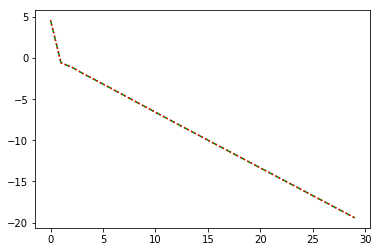

In [10]:
plt.plot(np.log(tf_losses), color='green', ls='--')
plt.plot(np.log(ag_losses), color='red', ls=':')
plt.show()

In [11]:
print(out)

[0.99997301 0.99997301 0.99997301 0.99997301 0.99997301 0.99994591
 0.99994591 0.99994591 0.99994591 0.99994591]
